In [203]:
file = open("vectors.txt","r")
data = file.readlines()
Nlines = len(data)
print("Nlines = ",Nlines)

Nlines =  278


In [204]:
wfile = open("words_idx.txt","r")
words = wfile.readlines()
Nwords = len(words)
print("Nwords = ",Nwords)

Nwords =  18446


In [205]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [206]:
Ndocs = int(Nlines/2)
A = np.zeros((Nwords,Ndocs))
Doc_idx = np.zeros((Ndocs,))
label = np.zeros((Ndocs,))
for j in range(Ndocs):
    Doc_idx = data[2*j]
    line = data[2*j+1]
    line = line.split()
    numbers = [eval(i) for i in line]
    label = numbers[0]
    w_idx = np.array(numbers[1::2])-1 # make indices start from 0
    w_count = numbers[2::2]
    A[w_idx,j] = 1       
# np.savetxt("Amatrix.csv", A, delimiter=",")

In [226]:
# given A=WH, extract common words from W corresponding to entries above threshold
def common_words_sort(W,threshold):
    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(figsize = (8,8))
    for j in range(k):
        ind = np.squeeze(np.argwhere(W[:,j] > threshold))
        Wargsort = W[ind,j].argsort()[::-1]
        print(W[ind,j][Wargsort])
        plt.plot(np.sort(W[:,j]))
        if len(Wargsort) > 0:
            for i in Wargsort:
                print(ind[i]+1,words[ind[i]])

In [227]:
def common_words(W,threshold):
    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(figsize = (8,8))
    for j in range(k):
        ind = np.squeeze(np.argwhere(W[:,j] > threshold))
        print(W[ind,j])
        plt.plot(np.sort(W[:,j]))
        if len(ind.tolist()) > 0:
            for i in range(len(ind.tolist())):
                print(ind[i]+1,words[ind[i]])

trial = 0
trial = 1
trial = 2
trial = 3
trial = 4


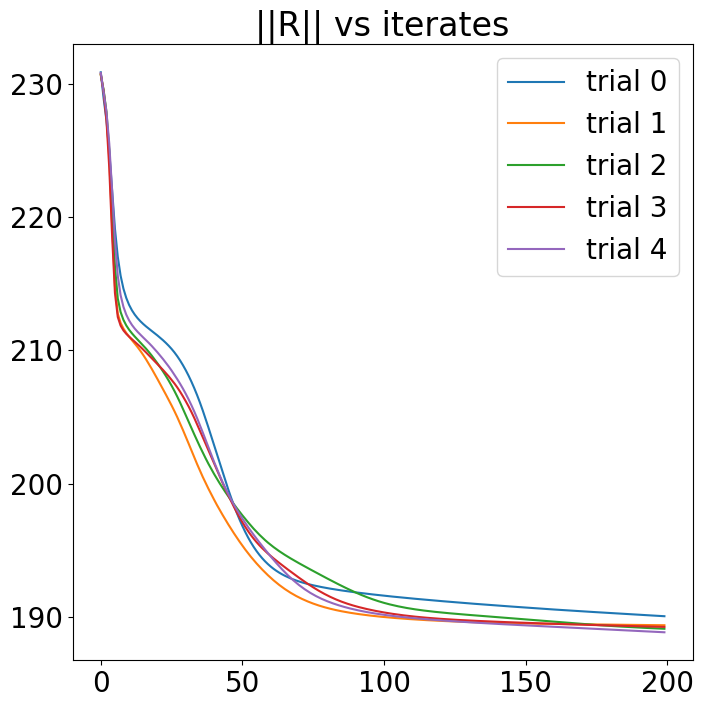

In [7]:
# PGD
k = 10
iter_max = 200
alpha = 5e-3 #stepsize

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
plt.title('||R|| vs iterates')

for trial in range(5):
    print('trial = {}'.format(trial))
    W = np.random.rand(Nwords,k)
    H = np.random.rand(k,Ndocs)
    R_FroNorm = np.zeros(iter_max)
    R = A - W@H
    for iter in range(iter_max):
        Wnew = np.maximum(0,W+alpha*R@H.T)
        W = Wnew
        Hnew = np.maximum(0,H+alpha*W.T@R)
        H = Hnew
        R = A - W@H
        R_FroNorm[iter] = la.norm(R,'fro')
    plt.plot(R_FroNorm, label='trial {}'.format(trial))

plt.legend(loc='upper right')
plt.savefig('hw6 pgd')
plt.show()

[0.25438542 0.24329055 0.24295289 ... 0.20028201 0.20021419 0.20011869]
379 379 2003

8038 8038 forecast

2308 2308 were

296 296 house

2531 2531 past

323 323 events

3 3 school

149 149 map

1363 1363 power

2435 2435 radio

2299 2299 john

2901 2901 big

853 853 year

328 328 was

1828 1828 opening

735 735 thursday

1587 1587 report

1835 1835 5th

1077 1077 east

882 882 during

1713 1713 mark

393 393 saturday

13319 13319 evansville

920 920 tuesday

154 154 web

96 96 com

394 394 sunday

292 292 event

146 146 news

604 604 place

300 300 his

791 791 search

2862 2862 went

2406 2406 editor

714 714 special

836 836 members

4213 4213 left

1562 1562 updated

1272 1272 development

2375 2375 travel

255 255 today

183 183 over

3311 3311 something

2476 2476 http

191 191 full

9221 9221 truck

7331 7331 indiana

2668 2668 death

2161 2161 inside

957 957 road

1561 1561 listen

317 317 but

2469 2469 dec

1202 1202 season

6835 6835 pro

1789 1789 mike

449 449 much

383 38

IndexError: invalid index to scalar variable.

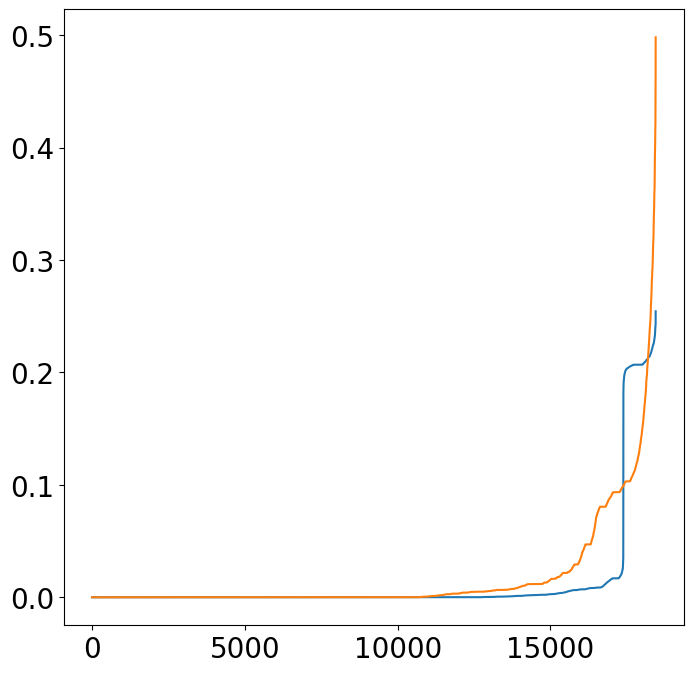

In [8]:
# PGD analysis
common_words(W,threshold=0.2)

trial = 0
iter = 0
|R| = 212.53845024598596
iter = 1
|R| = 207.05024329427337
iter = 2
|R| = 198.53664201883555
iter = 3
|R| = 194.54329808339133
iter = 4
|R| = 192.7332183682988
iter = 5
|R| = 191.68550211766828
iter = 6
|R| = 191.01002936997043
iter = 7
|R| = 190.53851926317898
iter = 8
|R| = 190.19994328826252
iter = 9
|R| = 189.9620573829754
iter = 10
|R| = 189.782789215395
iter = 11
|R| = 189.63463721953087
iter = 12
|R| = 189.51390239863966
iter = 13
|R| = 189.41819926884645
iter = 14
|R| = 189.34268874129427
iter = 15
|R| = 189.27924479191975
iter = 16
|R| = 189.22564464015963
iter = 17
|R| = 189.17880207701313
iter = 18
|R| = 189.13647187411695
iter = 19
|R| = 189.09802065779414
iter = 20
|R| = 189.06265200830543
iter = 21
|R| = 189.03129382357315
iter = 22
|R| = 189.00562858606327
iter = 23
|R| = 188.98621528653706
iter = 24
|R| = 188.97023034970505
iter = 25
|R| = 188.9547914183009
iter = 26
|R| = 188.93869319875267
iter = 27
|R| = 188.92157477252988
iter = 28
|R| = 188.90355

|R| = 189.05418431081185
iter = 35
|R| = 189.01911500885961
iter = 36
|R| = 188.98953790178743
iter = 37
|R| = 188.96324206474986
iter = 38
|R| = 188.93777574730933
iter = 39
|R| = 188.9122032018464
iter = 40
|R| = 188.88737430892982
iter = 41
|R| = 188.86528626146503
iter = 42
|R| = 188.84465336393902
iter = 43
|R| = 188.82434772793323
iter = 44
|R| = 188.80354213853585
iter = 45
|R| = 188.78187505392916
iter = 46
|R| = 188.7596026698701
iter = 47
|R| = 188.73746121353844
iter = 48
|R| = 188.71564294958927
iter = 49
|R| = 188.69438030501863
iter = 50
|R| = 188.67430400075176
iter = 51
|R| = 188.65490031170643
iter = 52
|R| = 188.63633295204315
iter = 53
|R| = 188.6184847782204
iter = 54
|R| = 188.60160961172218
iter = 55
|R| = 188.58605336798084
iter = 56
|R| = 188.57210622243474
iter = 57
|R| = 188.55996959991762
iter = 58
|R| = 188.54967289302044
iter = 59
|R| = 188.54111271196575
iter = 60
|R| = 188.5340983452811
iter = 61
|R| = 188.5284014235303
iter = 62
|R| = 188.5237671298038
i

|R| = 188.46209102107804
iter = 68
|R| = 188.45947473923118
iter = 69
|R| = 188.45682958538055
iter = 70
|R| = 188.4541857917687
iter = 71
|R| = 188.45156114113175
iter = 72
|R| = 188.4489816080822
iter = 73
|R| = 188.44646846769453
iter = 74
|R| = 188.44405002083388
iter = 75
|R| = 188.44176786401235
iter = 76
|R| = 188.43965279794185
iter = 77
|R| = 188.437724355203
iter = 78
|R| = 188.43599690235783
iter = 79
|R| = 188.4345795379527
iter = 80
|R| = 188.43341596919126
iter = 81
|R| = 188.43244670287172
iter = 82
|R| = 188.43162514273442
iter = 83
|R| = 188.4309488367645
iter = 84
|R| = 188.43039091553558
iter = 85
|R| = 188.42990886642653
iter = 86
|R| = 188.42948326924406
iter = 87
|R| = 188.42910468501412
iter = 88
|R| = 188.42876617167911
iter = 89
|R| = 188.42846227648025
iter = 90
|R| = 188.42818825277652
iter = 91
|R| = 188.4279404244016
iter = 92
|R| = 188.427715550145
iter = 93
|R| = 188.42751082869458
iter = 94
|R| = 188.42732382216823
iter = 95
|R| = 188.42715263155196
iter

|R| = 188.86790188993456
iter = 101
|R| = 188.86512884592844
iter = 102
|R| = 188.86230292202046
iter = 103
|R| = 188.85942420523338
iter = 104
|R| = 188.85648539744346
iter = 105
|R| = 188.85347776691353
iter = 106
|R| = 188.85039061461964
iter = 107
|R| = 188.8472266397651
iter = 108
|R| = 188.84398552560805
iter = 109
|R| = 188.84066891760708
iter = 110
|R| = 188.83726861553868
iter = 111
|R| = 188.83378334328583
iter = 112
|R| = 188.8302056275859
iter = 113
|R| = 188.826538230229
iter = 114
|R| = 188.82279391811502
iter = 115
|R| = 188.81896867146787
iter = 116
|R| = 188.81508868985125
iter = 117
|R| = 188.81117902545063
iter = 118
|R| = 188.80723594317078
iter = 119
|R| = 188.8032558512472
iter = 120
|R| = 188.79923739101952
iter = 121
|R| = 188.79518417225094
iter = 122
|R| = 188.79109978325067
iter = 123
|R| = 188.78698902828827
iter = 124
|R| = 188.78286790875308
iter = 125
|R| = 188.77875665068376
iter = 126
|R| = 188.77467062490473
iter = 127
|R| = 188.77062263923153
iter = 1

|R| = 188.42262859611927
iter = 134
|R| = 188.42259544196733
iter = 135
|R| = 188.42256528631194
iter = 136
|R| = 188.42253786443925
iter = 137
|R| = 188.42251293066775
iter = 138
|R| = 188.42249026307178
iter = 139
|R| = 188.42246964166083
iter = 140
|R| = 188.42245089665175
iter = 141
|R| = 188.42243388270168
iter = 142
|R| = 188.4224184679794
iter = 143
|R| = 188.42240454588946
iter = 144
|R| = 188.4223919935452
iter = 145
|R| = 188.422380679867
iter = 146
|R| = 188.4223704968244
iter = 147
|R| = 188.42236135809094
iter = 148
|R| = 188.42235316828172
iter = 149
|R| = 188.42234584755732
iter = 150
|R| = 188.42233931395654
iter = 151
|R| = 188.42233348895633
iter = 152
|R| = 188.4223283018442
iter = 153
|R| = 188.42232370330342
iter = 154
|R| = 188.42231964277462
iter = 155
|R| = 188.42231605895435
iter = 156
|R| = 188.42231289527896
iter = 157
|R| = 188.42231010219942
iter = 158
|R| = 188.4223076397969
iter = 159
|R| = 188.42230547532972
iter = 160
|R| = 188.42230357449267
iter = 161

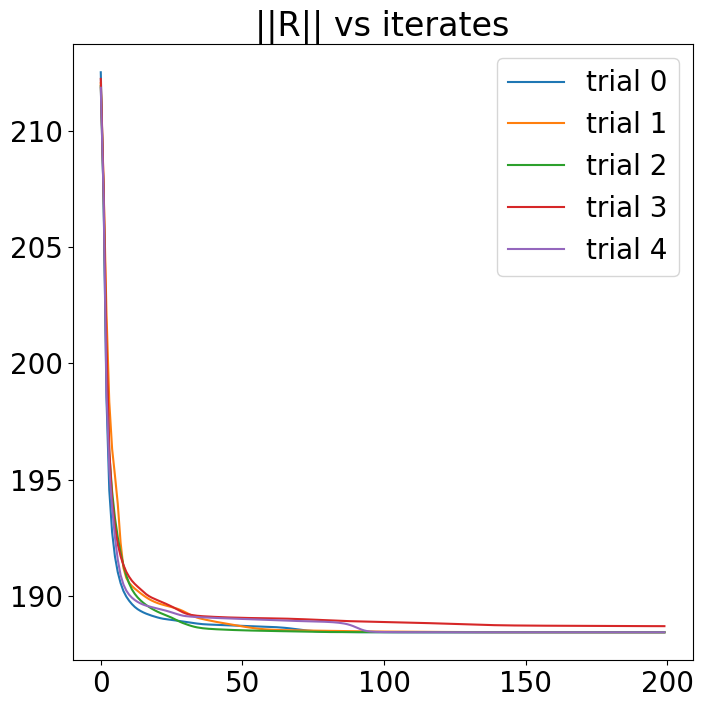

In [208]:
# HALS
k = 10
iter_max = 200
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
plt.title('||R|| vs iterates')

for trial in range(5):
    
    print('trial = {}'.format(trial))
    W = np.random.rand(Nwords,k)
    H = np.random.rand(k,Ndocs)
    R = A - W@H
    R_FroNorm = np.zeros(iter_max)
    
    for iter in range(iter_max):
        
        print('iter =',iter)
    
        for k0 in range(k):
            
            #print('k0 =',k0)
            
            RHt = R@H.T
            HHt = H@H.T
            
            u = np.zeros(Nwords)
            for i in range(Nwords):
                #print('i =',i)
                #print(W[i,k0],RHt[i,k0],HHt[k0,k0])
                u[i] = np.maximum(-W[i,k0],RHt[i,k0]/(HHt[k0,k0]+1e-12)) # +1e-12 to prevent division by 0
            W[:,k0] = W[:,k0] + u
            R = R - np.outer(u,H[k0,:])

            WtR = W.T@R
            WtW = W.T@W
        
            v = np.zeros(Ndocs)
            for j in range(Ndocs):
                #print('j =',j)
                #print(H[k0,j],WtR[k0,j],WtW[k0,k0])
                v[j] = np.maximum(-H[k0,j],WtR[k0,j]/(WtW[k0,k0]+1e-12)) # +1e-12 to prevent division by 0
            H[k0,:] = H[k0,:] + v
            R = R - np.outer(W[:,k0],v)
            
        R_FroNorm[iter] = la.norm(R,'fro')
        print('|R| =',R_FroNorm[iter])
        
    plt.plot(R_FroNorm, label='trial {}'.format(trial))

plt.legend(loc='upper right')
plt.savefig('hw6 hals')
plt.show()

[]
[]
[]
[]
[]
[]
[0.36648496 0.45433075 0.3872904  0.45673526 0.39739174 0.39993337
 0.34296123 0.22282369 0.35943695 0.45459688 0.37579169 0.43573337
 0.25414477 0.41368285 0.38724628 0.40570972 0.21041613 0.21862049
 0.24607217 0.36514527 0.24666225 0.28351086 0.28423077 0.22318876
 0.2706341  0.3064085  0.22532887 0.42163015 0.24458769 0.36389264
 0.30035534 0.27285772 0.28355728 0.22156327 0.23358125 0.28527336
 0.26296437 0.26655456 0.34445945 0.33777006 0.23317596 0.32854714
 0.2644781  0.29530934 0.2458691  0.25837001 0.25485761 0.21386433]
7 7 home

8 8 the

10 10 your

18 18 and

36 36 this

37 37 you

38 38 will

39 39 need

44 44 can

46 46 for

48 48 from

52 52 gif

54 54 click

55 55 our

67 67 all

69 69 are

78 78 area

79 79 call

96 96 com

147 147 contact

148 148 site

163 163 here

164 164 not

178 178 time

190 190 please

199 199 one

214 214 out

219 219 with

224 224 make

228 228 that

239 239 information

276 276 jpg

291 291 service

295 295 their

318 318 

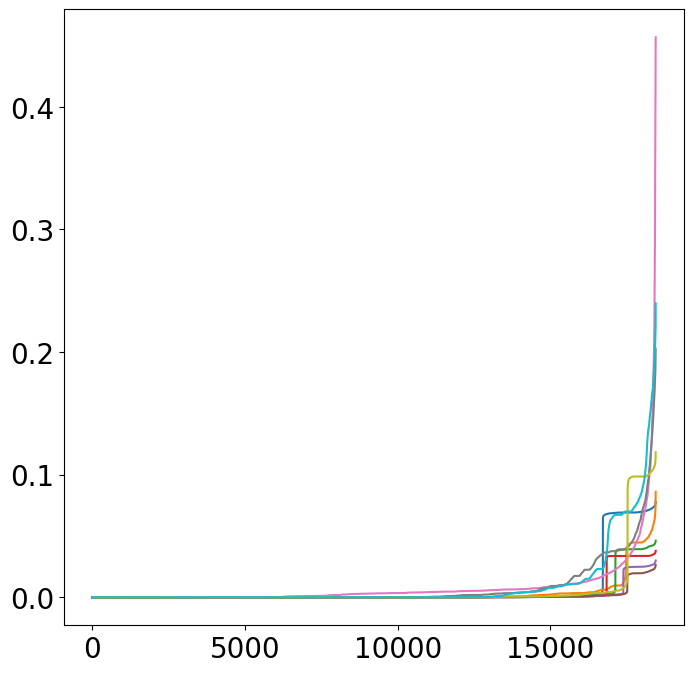

In [232]:
# HALS analysis
common_words(W,threshold=0.21)

In [209]:
# SVD
U, S, Vh = la.svd(A)
Uk = U[:,:k]
Sk = np.diag(S[:k])
Vhk = Vh[:k,:]
Ak = Uk@Sk@Vhk
truncnorm = la.norm(A-Ak)
print('frobenius error of truncated SVD =',truncnorm)

frobenius error of truncated SVD = 187.7240897272622
